In [1]:
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
# nltk.download()

In [2]:
# Pre-processing!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
def cleanArticle(file2read):
#declare extra words and punctuations
    stop_words = set(stopwords.words('english') + list(string.punctuation)) 
#declare the returning variable
    article = '' 
#declare extra chars of article which are not included in the previous packages 
    customExtras = ["\n", "’", "“", "”", "'", "`","1","2","3","4","5","6","7","8","9","0","—",".."] 
#function that converts arr of strings into one string (used later)
    def listToString(s): 
        str1 = " "
        return (str1.join(s))

#remove extra chars in article
    for i in customExtras: 
        file2read = file2read.replace(i, "")
#converts article into array of words
    word_tokens= word_tokenize(file2read.lower()) 
    # print(word_tokens)

#empty array of clean words
    filtered_file2read =[] 

#check if word from article is the extra,if not assign the word in the clean words array
    for w in word_tokens: 
        if w not in stop_words:
            filtered_file2read.append(w)

#print(filtered_file2read)

    article = listToString(filtered_file2read)
#print(article)
    
    return article

In [3]:
#Technology folder !!!!!!!!!!!!!!!!!!!!!!
#change directory to technology training
#restart kernel if rerunning code
os.chdir("Technology/Training/")
dirTecharticle = os.listdir()
#cwd = os.getcwd()
#print(cwd)

articlestr = []
genrestr = []

#creating dictionary for data frame to be used
trdata = {'article': articlestr,
        'genre': genrestr
        }

#open training technology articles
#articles will be extracted and placed in the dataframe         
for file in dirTecharticle:
     file2read = open(file,'r').read()
#apply the preprocessing function 
     file2read = cleanArticle(file2read)
     articlestr.append(file2read)
     genrestr.append("Technology")
     
datatr = pd.DataFrame(trdata)
print(datatr)

                                               article       genre
0    apple today released ios ipados minor bug fix ...  Technology
1    use iphone windows pc syncing photos get lot e...  Technology
2    google decided use new integrated gmail experi...  Technology
3    xboxs matt booty grounded topped million playe...  Technology
4    pokémon go implements new features basically e...  Technology
..                                                 ...         ...
195  need knowsamsung continues one ui rollout mid-...  Technology
196  theres statement weve repeated countless times...  Technology
197  pixel pro glance picked handful new features p...  Technology
198  googleron amadeostarting month users holding n...  Technology
199  coming one year post-launch new ‘ unified view...  Technology

[200 rows x 2 columns]


In [4]:
# Sports folder!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
os.chdir("../../Sports/Training/")
dirSportsarticle= os.listdir()
# cwd = os.getcwd()
# print(cwd)


#articles from sports folder
for file in dirSportsarticle:
     file2read = open(file,'r').read()
     # apply the pre-processing function
     file2read = cleanArticle(file2read)
     articlestr.append(file2read)
     genrestr.append("Sports")

datatr = pd.DataFrame(trdata)
print(datatr)

                                               article       genre
0    apple today released ios ipados minor bug fix ...  Technology
1    use iphone windows pc syncing photos get lot e...  Technology
2    google decided use new integrated gmail experi...  Technology
3    xboxs matt booty grounded topped million playe...  Technology
4    pokémon go implements new features basically e...  Technology
..                                                 ...         ...
395  across explosive first half offensively jackso...      Sports
396  houston astros world series champions astros d...      Sports
397  probably remember exactly philadelphia phillie...      Sports
398  houston leaned dugout railing like colts waiti...      Sports
399  saturday night dusty baker managed games major...      Sports

[400 rows x 2 columns]


In [5]:
#assign `label`` to dataframe if technology then label = 0  if not label = 1
datatr["label"] = datatr["genre"].apply(lambda x: 0 if x=="Technology" else 1)
datatr

,article,genre,label
0,apple today released ios ipados minor bug fix ...,Technology,0
1,use iphone windows pc syncing photos get lot e...,Technology,0
2,google decided use new integrated gmail experi...,Technology,0
3,xboxs matt booty grounded topped million playe...,Technology,0
4,pokémon go implements new features basically e...,Technology,0
...,...,...,...
395,across explosive first half offensively jackso...,Sports,1
396,houston astros world series champions astros d...,Sports,1
397,probably remember exactly philadelphia phillie...,Sports,1
398,houston leaned dugout railing like colts waiti...,Sports,1


In [6]:
from sklearn.model_selection import train_test_split
#X - articles for testing and training y- labels for testing and training
X_train, X_test, y_train, y_test = train_test_split(datatr["article"], datatr["label"], random_state=1)
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
 #tokenizes the documents and converts it to matrix
cv = CountVectorizer(strip_accents="ascii") 
#Learn the vocabulary dictionary and return document-term 
X_train_cv = cv.fit_transform(X_train)
#Transform documents to document-term matrix.
X_test_cv = cv.transform(X_test)
# print(X_train_cv)


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC #For confidence

conmodel = SVC(probability=True)
conmodel.fit(X_train_cv,y_train)
class_prob = conmodel.predict_proba(X_test_cv)

# declare naive bayes model
naive_bayes = MultinomialNB()
#train naive bayes model
naive_bayes.fit(X_train_cv, y_train)
#predict
predictions = naive_bayes.predict(X_test_cv)
# print(predictions)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
#display accuracy Percision and Recall
accuracy = "Accuracy score: " + str(accuracy_score(y_test, predictions))
precision = "Precision score: " + str(precision_score(y_test, predictions))
recallscore = "Recall score: " + str(recall_score(y_test, predictions))
print(accuracy)
print(precision)
#printing string elements from index 0 to 17
print(recallscore[0:18])

confidence_list_sports = []#confidence for sports
confidence_list_tech = []#confidence for tech
for i in range(len(class_prob)):
    confidence_list_tech.append(class_prob[i][0]*100)

for i in range(len(class_prob)):
    confidence_list_sports.append(class_prob[i][1]*100)

#print(class_probabilities[0][0] * 100) #1st [0] shows document if 2nd [0] shows confidence for sports if 2nd [1] shows confidence for tech
# print(len(confidence_list_tech))

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0


Text(91.68, 0.5, 'predicted label')

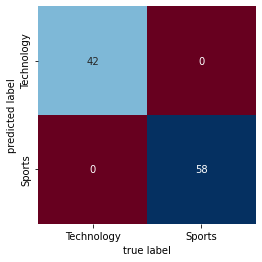

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#Storing confusion matrix in cm with the parameters of actual labels(y_test) & predictions from naive bayes
cm = confusion_matrix(y_test, predictions)
#creating the graph for cm, square is the shape, annot is the number displayed in each quadrant,cmap is the colour
# & cbar is the represents the number of articles in each quadrant as colour(darker blue being the most and red the lowest)
sns.heatmap(cm, square=True, annot=True, cmap="RdBu", cbar=False,
#Quadrant labels 
#positive = Technology
#negative = Sports
xticklabels=["Technology", "Sports"], yticklabels=["Technology", "Sports"])
#X & Y labels of the entire graph
plt.xlabel("true label")
plt.ylabel("predicted label")
# print(cm)
# 42 articles are predicted technology and is technology.(true positive)
# 57 articles are predicted Sports and is sports. (true negative)
# 1 article was predicted Sports but was technology. (false positive)
# 0 articles were predicted as technology but was sports.(false negative)

In [11]:
#array which will contain predictions
tepredictions = []
#loop length = total amount of documents
#if predicion of that document is 1 which means it's technology append tepredictions with tech else append with sports
for i in range(len(X_test)): 
    if predictions[i] == 1:
        tepredictions.append("Sports")
    else:
        tepredictions.append("Technology")
#Init the dataframe for the model
model = pd.DataFrame({"actual_label": list(y_test), "prediction": tepredictions, "article":list(X_test), 'confidence(tech) %':list(confidence_list_tech), 'confidence(sports) %': list(confidence_list_sports)})
#replace 0s in table with sports
model.replace(to_replace=0, value="Technology", inplace=True)
#replace 1s in table with tech
model.replace(to_replace=1, value="Sports", inplace=True)
model

,actual_label,prediction,article,confidence(tech) %,confidence(sports) %
0,Sports,Sports,houston leaned dugout railing like colts waiti...,9.122577e-08,100.000000
1,Technology,Technology,listened podcast listen,8.387074e+01,16.129260
2,Sports,Sports,notre dame earned impressive victory previousl...,3.380761e+01,66.192389
3,Sports,Sports,tampa fla. -- slow start offense tampa bay buc...,8.542613e+00,91.457387
4,Technology,Technology,sony interactive entertainment announced novem...,8.534759e+01,14.652408
...,...,...,...,...,...
95,Sports,Sports,ap poll georgia bulldogs team entering last we...,5.563447e-01,99.443655
96,Sports,Sports,san ysidro teammates mikey williams jj taylors...,6.864833e-01,99.313517
97,Sports,Sports,tom brady connects leonard fournette -yard gai...,1.057057e-05,99.999989
98,Sports,Sports,thoughts auburns overtime loss mississippi sta...,7.006809e+00,92.993191


In [12]:
#User custom article!!!!!!!!!!!!!!!!!!!!!
def predictArticle(article):
#Prediction value to be used later
    pred = []
#clean the article from extra words and chars
    clean_article = cleanArticle(article)
#redeclare clean_article as an iterable object (list)
    clean_article = [clean_article]
#convert clean_article into an array of features
    cv_article = cv.transform(clean_article)
#predict the genre of the article
    temp_nb = naive_bayes.predict(cv_article)
#confidence for the article
    article_conf = conmodel.predict_proba(cv_article)
    conf_tech = article_conf[0][0]*100
    conf_sports = article_conf[0][1]*100
#set value of prediction from NB
    pred.append(temp_nb[0])
    pred.append(conf_tech)
    pred.append(conf_sports)

    return pred

In [14]:
from pathlib import Path
import PySimpleGUI as sg

headings = [' Actual Label ', ' Prediction ', '     Article     ','confidence(sports) %','confidence(tech) %'] # headers for the table
table = model #actual table

values = table.values.tolist() # value for the table


def popup_text(filename, text): # displays popup which contains the article the user selected

    layout = [  # declare the layout of the popup window
        [sg.Multiline(text, size=(100, 25)),], # display text on multiple lines instead of one long line, give it size of 100-width and 25-height
    ]
    # declare window with the name of the file, layout, modal = true means user wont be able to interact with any other windows
    win = sg.Window(filename, layout, modal=True) 

    while True: # listening to events by using infinite loop
        event, values = win.read() # read events and their values from the window
        if event == sg.WINDOW_CLOSED: # if event of closing the window occues break the loop
            break
    win.close() # close the window

conf_sports = "Select a file"
conf_tech = "select a file"
predVal = "Select a file" # predicted value (used later for displaying article's genre)

sg.theme("DarkTeal2") # declare theme frot the file
layout = [[sg.T("")],
 [sg.Text("Article Sorter")], # text in article sorter
 [sg.Text("---------------------------------------------------------------")],
 [sg.Text(accuracy)],
 [sg.Text(recallscore)],
 [sg.Text(precision)],
 # decalre tables where value  is entries converted to list from predicted Data and assign headings
 [sg.Table(values = values, headings = headings, 
 auto_size_columns=False, # default size of columns  = false
 # column width = the size of the heading of that column + 1 for every single row, col_widths must have a value of list
 col_widths=list(map(lambda x:len(x)+1, headings)))], 
 [sg.Text("---------------------------------------------------------------")],
 [sg.Text("Select an Article: "),
 sg.Input(key="txt"), # declare input witht the id of txt
 sg.FilesBrowse(file_types=(('Text File',' *.txt'),))], # browse through the files display the text files of extension .txt in file browser
 [sg.Button("Submit"),sg.Button("Exit")], # declare button for submit and exit
 [sg.Text("---------------------------------------------------------------")],
 # declare text which will display predVal(was declared before) and have id of -predVal-
 [sg.Text('Prediction: '), sg.Text(predVal, key="-predVal-")],
 [sg.Text('confidence(sports): '),sg.Text(conf_sports,key="-conf_sports-")],
 [sg.Text('confidence(tech): '),sg.Text(conf_tech,key="-conf_tech-")]]


# declare  window
window = sg.Window('Article Sorter', layout, size=(800,600))

while True: # infinite loop for listening
    event, values = window.read() # read events and values from the window
    # if event with the name of 'Exit' has occured or window has been closed break the loop and close the window
    if event == sg.WINDOW_CLOSED or event == 'Exit': 
        window.close()
        break
    elif event == 'Submit': # if event with the name of 'Submit' has occured
        print(values["txt"]) # print value of event 'txt' in the terminal (for debug purposes)
        filename = values['txt'] # assign event value which will contain the file address to variable called filename
        if Path(filename).is_file(): # if the directory is the file and not folder or anything else
            try: # try block
                with open(filename, "rt", ) as t: # open file with "rt" which means read text
                    text = t.read() # read the text (convert to a string)
                    val_pred = predictArticle(text) # return the prediction value and assign it to a variable
                    # print(val_pred)
                
                if(val_pred == 0): # if prediction value  is 0
                    # update the value of predVal (which is used for displaying the preidction variable on the window) to Technology
                    window['-predVal-'].update("Technology") 
                else:
                    window['-predVal-'].update("Sports") # else update to Sports
                window['-conf_sports-'].update(predictArticle(text)[2])
                window['-conf_tech-'].update(predictArticle(text)[1])
                popup_text(filename, text) # popup (function defined before) window with the selected text
            except Exception as e: # in case exception happens
                print("Error: ", e) # console log exception

C:/Users/Enigma/Projects/Python_classifier/Sports/Testing/TeSportsArticle1.txt
C:/Users/Enigma/Projects/Python_classifier/Technology/Testing/TeTechnologyArticle3.txt
